In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("column_3C_weka.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None


In [3]:
df=df.rename(columns = {'class':'output'})

In [4]:
y=df.output.values
x_data=df.drop(["output"],axis=1)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   output                    310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None


In [6]:
from sklearn.preprocessing import LabelEncoder  # object olan Sınıf değerlerinin dönüşümleri gerçekleştirildi.
enc = LabelEncoder() 
df['output'] = enc.fit_transform(df['output'])
df.tail()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis  output  
305     117.449062                 -4.245395       1  
306     114.365845                 -0.421010       1  
307     125.670725                 -2.707880       1  
308     118.545842                  0.214750       1  
309     123.945244                 -0.199249       1

In [7]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [8]:
 from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (248, 6)
y_train: (248,)
x_test: (62, 6)
y_test: (62,)


In [9]:
from sklearn.neural_network import MLPClassifier

mlpc=MLPClassifier(random_state=1)
mlpc.fit(x_train,y_train)

C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=1)

In [10]:
print("mlpc score:",mlpc.score(x_test,y_test))

mlpc score: 0.7419354838709677


In [11]:
 mlpc_2=MLPClassifier(random_state=1,solver="lbfgs",activation="logistic",hidden_layer_sizes=(3,5))
mlpc_2.fit(x_train,y_train)
print("mlpc_2 score:",mlpc_2.score(x_test,y_test))

mlpc_2 score: 0.8387096774193549


C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# K-fold cross validation

In [12]:
import numpy as np
import pandas as pd

In [13]:
df=pd.read_csv("column_3C_weka.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None


In [14]:
df=df.rename(columns = {'class':'output'})

In [15]:
from sklearn.preprocessing import LabelEncoder  # object olan Sınıf değerlerinin dönüşümleri gerçekleştirildi.
enc = LabelEncoder() 
df['output'] = enc.fit_transform(df['output'])
df.tail()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis  output  
305     117.449062                 -4.245395       1  
306     114.365845                 -0.421010       1  
307     125.670725                 -2.707880       1  
308     118.545842                  0.214750       1  
309     123.945244                 -0.199249       1

In [24]:
y=df.output.values
x_data=df.drop(["output"],axis=1).values

In [25]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [26]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

scores=[]

kf=KFold(n_splits=10,random_state=1)
mlpc=MLPClassifier(solver="lbfgs",activation="logistic",hidden_layer_sizes=(3,5))

for train_indexler,test_indexler in kf.split(x):
    mlpc.fit(x[train_indexler],y[train_indexler])
    score=mlpc.score(x[test_indexler],y[test_indexler])
    scores.append(score)
    print(score)
    
print("ortalama score:",np.mean(scores))

C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.0
0.6129032258064516


C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7741935483870968
0.9354838709677419


C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


1.0
0.9354838709677419


C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.967741935483871
0.6451612903225806
0.7741935483870968
0.8064516129032258
ortalama score: 0.7451612903225807


C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# gridsearch

In [27]:
df=pd.read_csv("column_3C_weka.csv")

In [28]:
df=df.rename(columns = {'class':'output'})

In [29]:
y=df.output.values
x_data=df.drop(["output"],axis=1)

In [30]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [32]:
from sklearn.model_selection import GridSearchCV

mlpc_params={"alpha":[0.1,0.01,0.001,0.0001],
            "hidden_layer_sizes":[(10,10),(3,3,3),(100,100),(3,5,3)],
            "solver":["lbfgs","adam","sgd"]}

mlpc=MLPClassifier(activation="logistic",random_state=1)

mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   34.9s finished
C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [33]:
print(mlpc_cv_model.best_params_)

{'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'solver': 'lbfgs'}


In [34]:
mlpc_tuned=MLPClassifier(alpha=0.01,hidden_layer_sizes=(100,100),solver="adam").fit(x_train,y_train)
print("score:",mlpc_tuned.score(x_test,y_test))

score: 0.8387096774193549


C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Modeli değerlendirmek

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

df=pd.read_csv("column_3C_weka.csv")#BU kısımda kütüphaneyi yükleyemediğimden dolayı hata alıyorum.

In [36]:
df=df.rename(columns = {'class':'output'})

In [37]:
y=df.output.values
x_data=df.drop(["output"],axis=1)

In [38]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [40]:
 mlpc=MLPClassifier(alpha=0.01,hidden_layer_sizes=(3,5),solver="lbfgs",activation="logistic",max_iter=500).fit(x_train,y_train)

C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [41]:
import sklearn.metrics as metrics

y_pred=mlpc.predict(x_test)

In [42]:
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.8709677419354839


In [43]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[10  1  0]
 [ 5 15  0]
 [ 1  1 29]]


In [45]:
f1=metrics.f1_score(y_test,y_pred)
print("f1 score:",f1)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [46]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

                   precision    recall  f1-score   support

           Hernia       0.62      0.91      0.74        11
           Normal       0.88      0.75      0.81        20
Spondylolisthesis       1.00      0.94      0.97        31

         accuracy                           0.87        62
        macro avg       0.84      0.86      0.84        62
     weighted avg       0.90      0.87      0.88        62



3 sınıf etiketli olduğundan roc ve auc çizdirilmedi.

#  Seaborn

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [58]:
df=pd.read_csv("column_3C_weka.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None


In [59]:
df=df.rename(columns = {'class':'output'})

In [60]:
y=df.output
x_data=df.drop(["output"],axis=1)
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [61]:
 x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [62]:
mlpc=MLPClassifier(activation="relu",solver="adam",max_iter=1000,hidden_layer_sizes=(50,50,50))
mlpc.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=1000)

In [63]:
y_pred=mlpc.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.8548387096774194


In [64]:
cr=classification_report(y_test,y_pred)
print(cr)

                   precision    recall  f1-score   support

           Hernia       0.64      0.82      0.72        11
           Normal       0.80      0.80      0.80        20
Spondylolisthesis       1.00      0.90      0.95        31

         accuracy                           0.85        62
        macro avg       0.81      0.84      0.82        62
     weighted avg       0.87      0.85      0.86        62



In [65]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 9  2  0]
 [ 4 16  0]
 [ 1  2 28]]


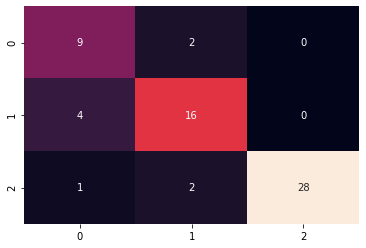

In [66]:
sns.heatmap(cm,cbar=False,annot=True,fmt="")

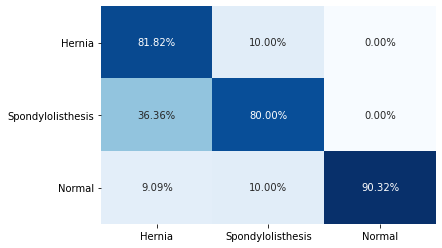

In [67]:
 class_adlari=["Hernia","Spondylolisthesis","Normal"]
sns.heatmap(cm/cm.sum(axis=1), annot=True, cbar=False, cmap="Blues",xticklabels=class_adlari,yticklabels=class_adlari,fmt=".2%")

#  Keras

In [96]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D,MaxPool2D,BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [97]:
df=pd.read_csv("column_3C_weka.csv")

In [100]:
df=df.rename(columns = {'class':'output'})

In [101]:
from sklearn.preprocessing import LabelEncoder  # object olan Sınıf değerlerinin dönüşümleri gerçekleştirildi.
enc = LabelEncoder() 
df['output'] = enc.fit_transform(df['output'])
df.tail()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis  output  
305     117.449062                 -4.245395       1  
306     114.365845                 -0.421010       1  
307     125.670725                 -2.707880       1  
308     118.545842                  0.214750       1  
309     123.945244                 -0.199249       1

In [102]:
df=df.rename(columns = {'class':'output'})

In [103]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [104]:
input_shape=x_train.shape[1:]
print(input_shape)

(6,)


In [114]:
model=Sequential()
model.add(Dense(300,activation="relu",input_dim=6))


model.add(Dense(100,activation="relu"))

model.add(Dense(1,activation="softmax"))


In [115]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [116]:
egitim=model.fit(x_train,y_train,epochs=2,validation_data=(x_test,y_test))

Epoch 1/2


UnimplementedError:  Cast string to float is not supported
	 [[node categorical_crossentropy/Cast (defined at <ipython-input-116-29e9c7cedc91>:1) ]] [Op:__inference_train_function_5447]

Function call stack:
train_function


In [135]:
plt.plot(egitim.history["acc"])
plt.plot(egitim.history["val_acc"])
plt.show()

NameError: name 'plt' is not defined

In [136]:
import sklearn.metrics as metrics

y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)
cm=metrics.confusion_matrix(y_true,y_pred)
print(cm)

NameError: name 'model' is not defined